<a href="https://colab.research.google.com/github/jecampagne/cours_mallat_cdf/blob/main/cours2024/Wavelet1DDenoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example of wavelet denoising 1D
 use a simple hard thresholding technics


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np

In [9]:
from pywt import swt,iswt,threshold  # wavelet lib.

In [5]:
#signal
def f(x):
    return (5+np.piecewise(x,[x>=0, x>=0.05, x>=0.2,x>=0.55,x>=0.75, x>=0.9],
                [0, -30.,
                 lambda x: 10-10*np.sin((8*x + 0.8)*np.pi),
                 lambda x: 100-5*np.exp(4*x),
                 lambda x: -(80-5*np.exp(3*x)),
                 0.]))*2

In [7]:
Ns= 2**11
xvals = np.linspace(0.,1.,Ns)
signal = f(xvals)

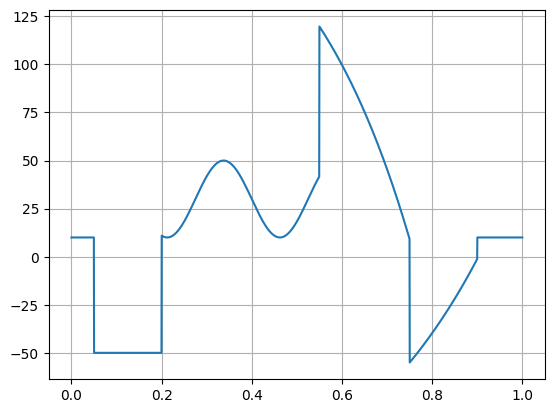

In [8]:
plot(xvals,signal)
grid()

In [11]:
level=6    # level of decomposition (if None then get maximum depth)
wave="db2" # type of wavelet: db2 aka Daubechies 2  ("db1" is Haar)

In [12]:
coeffs = swt(signal,wave,level=level,trim_approx=True) # use stationnary wavelet decompostion

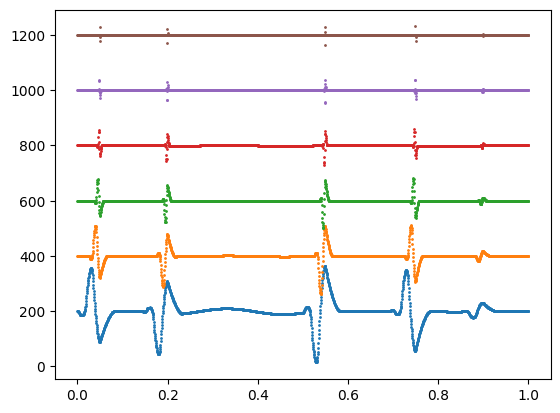

In [15]:
# show details coefficients on the same plot
for i in range(1,len(coeffs)):
    scatter(xvals,i*200 + coeffs[i],s=1)

In [18]:
#noisy observation
sigma = 3.
noise = sigma*np.random.normal(size=(Ns,))
obs = signal + noise

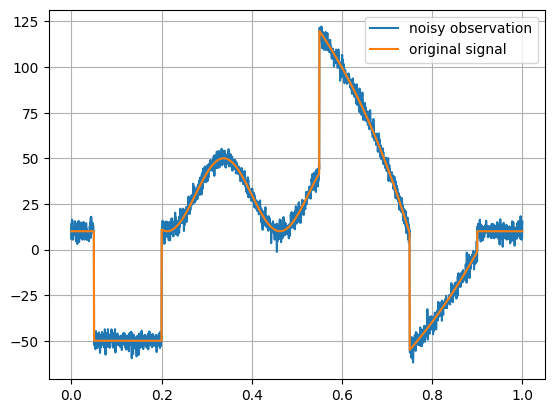

In [20]:
plot(xvals,obs,label="noisy observation")
plot(xvals,signal,label="original signal")
legend()
grid()

In [21]:
# decompsition of noisy observation
coeffs_o = swt(obs,wave,level=level,trim_approx=True)

In [23]:
# Hard threshold denoising
coeffs_o_th = coeffs_o.copy()
Threshold = 5*sigma
for i in range(0,len(coeffs_o)):
    coeffs_o_th[i] = threshold(coeffs_o[i],Threshold,mode='hard',substitute=0)

In [24]:
# estimation of denoised signal
hat_signal = iswt(coeffs_o_th,wave)

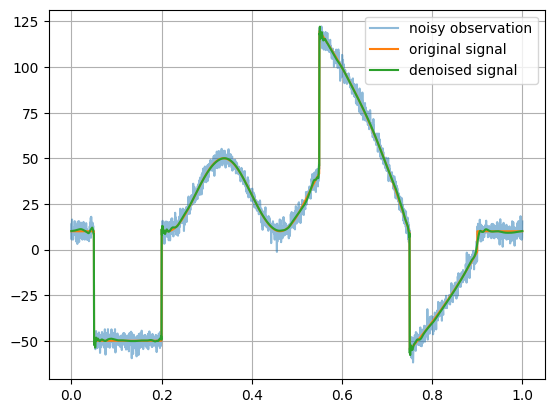

In [25]:
plot(xvals,obs,label="noisy observation",alpha=0.5)
plot(xvals,signal,label="original signal")
plot(xvals,hat_signal, label="denoised signal")
legend()
grid()

In [26]:
#metric to compare x wrt x_refernce
def metric(x,xref):
    return 10*np.log10(np.mean(xref**2)/np.mean((x-xref)**2))

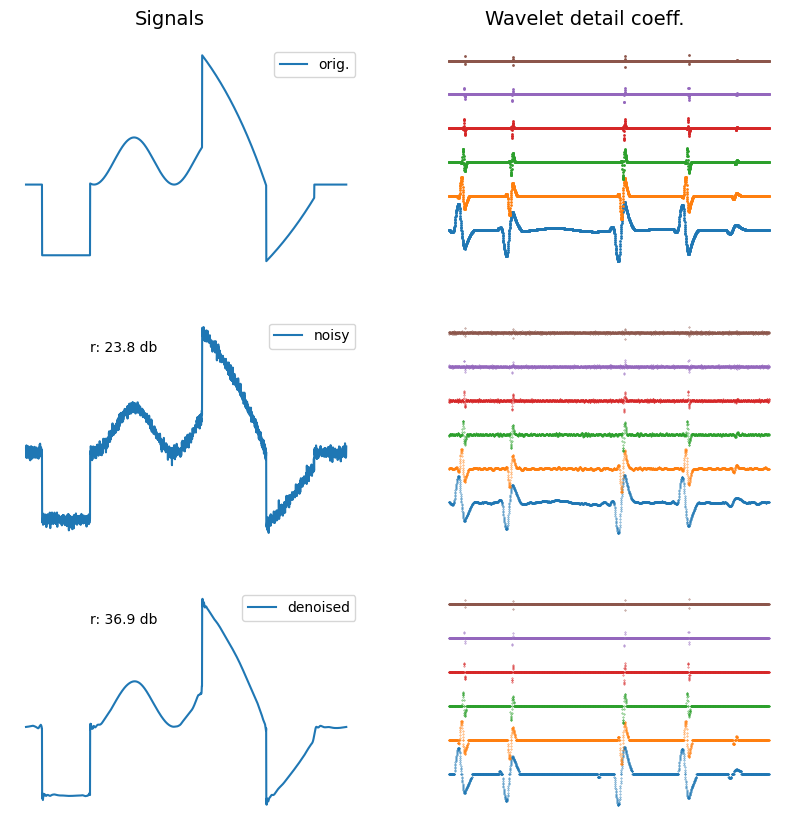

In [34]:
fig,axs=subplots(3,2,figsize=(10,10))
axs[0,0].plot(xvals,signal,label="orig.")
axs[1,0].plot(xvals,obs,label="noisy")
axs[2,0].plot(xvals,hat_signal,label="denoised")
axs[0,0].legend()
axs[1,0].legend()
axs[2,0].legend()

axs[1,0].text(0.2,100,f"r: {metric(obs,signal):.3} db")
axs[2,0].text(0.2,100,f"r: {metric(hat_signal,signal):.3} db")


for i in range(1,len(coeffs)):
    axs[0,1].scatter(xvals,i*200 + coeffs[i],s=1)
    axs[1,1].scatter(xvals,i*200 + coeffs_o[i],s=0.1)
    axs[2,1].scatter(xvals,i*200 + coeffs_o_th[i],s=0.1)

for ax in axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

fig.text(0.25,0.9,"Signals",fontsize=14);
fig.text(0.6,0.9,"Wavelet detail coeff.",fontsize=14);